# Week 7 Hand-in

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

import bs4
import json


## Perform a search and return a list of Articles from the search and the new page_url  

def natgeo_interaction(search: str, element: str, url: str):
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    
    # headless is needed here because we do not have a GUI version of firefox
    options = Options()
    options.headless = True
       
    # driver = webdriver.Firefox(options=options, executable_path=r'/tmp/geckodriver')
    browser = webdriver.Firefox(options=options)
       
    # browser = webdriver.Firefox()
    browser.get(url)
    
    browser.implicitly_wait(2)

    ##if browser.find_element_by_class_name('onetrust-pc-dark-filter').is_displayed(): 
        ##print('not_success')
        ##button = browser.find_element_by_id('onetrust-accept-btn-handler')
        ##button.click()
    ##else:
    
    search_field = browser.find_element_by_class_name('SearchBar__Input')
    search_field.send_keys(search)
    button = browser.find_element_by_xpath('//*[@id="natgeo-search-input"]/div/form/button')
    button.click()
    sleep(3)
    
    articles = browser.find_elements_by_class_name(element)
    page_url = browser.current_url
    return articles, page_url




In [2]:
## Return number of Articles on the page from the search and page url.

search = 'COVID'
element ='ResultCard' # The wrapper class for articles
url = 'https://www.nationalgeographic.com/search'

articles, page_url = natgeo_interaction(search, element, url)

print(f'There are {len(articles)} acticles for {search}')
print(page_url)


There are 16 acticles for COVID
https://www.nationalgeographic.com/search?q=COVID&location=srp&type=manual


In [3]:
# Return a list of the a-tags from articles

def find_links_for_default_page(page):
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    
    # headless is needed here because we do not have a GUI version of firefox
    options = Options()
    options.headless = True
       
    # driver = webdriver.Firefox(options=options, executable_path=r'/tmp/geckodriver')
    browser = webdriver.Firefox(options=options)
       
    # browser = webdriver.Firefox()
    browser.get(page)    
    Result_set = browser.find_elements_by_xpath("//a[@class='AnchorLink ResultCard__Link'][@href]")    
    Attribute_set = [link.text for link in Result_set]
    return Result_set, Attribute_set

Result_set, Attribute_set = find_links_for_default_page(page_url)
print(type(Result_set))

<class 'list'>


In [4]:
# Return a list of the links connecting to the articles (from the search field)

def links(list):
    links = []
    for elem in list:
        my_href = elem.get_attribute("href")
        if 'article' in my_href:
            ref = my_href
            links.append(ref)
        else:
           pass
    return links
Result_set = links(Result_set)

Populating the interactive namespace from numpy and matplotlib


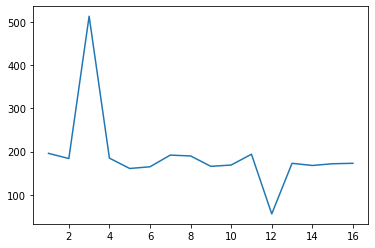

In [15]:
# Go through every article 1-16, select 'a' tags, return a dictionary and plot links per article 

import requests
import pandas as pd
import matplotlib.pyplot as plt

def find_links_for_articles(list):
    dict ={}
    counter = 0
    for link in list:
        r = requests.get(link)
        r.raise_for_status()
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        elems = soup.select('a')
        number_of_a = len(elems)
        counter += 1
        dict.setdefault(counter, number_of_a)
    return dict
dict = find_links_for_articles(Result_set)

def make_plot(dict):
    plt.plot(list(dict.keys()), list(dict.values()))
make_plot(dict)
    



## Class exercise 1


In [ ]:
%pylab inline 


In [8]:
text = """
"Peter Hansen was meeting up with Jacob Fransen for a quick lunch, but first he had to go by Peter Beier to pick up some chokolate for his wife. Meanwhile Pastor Peter Jensen was going to church to give his sermon for the same 3 people in his parish. Those were Peter Kold and Henrik Halberg plus a third person who had recently moved here from Norway called Peter Harold".
"""

In [9]:
import re

p = re.compile(r'(Peter)(\s)(\w+)')
peter_family_names = p.findall(text)
print(peter_family_names)
print(type(peter_family_names))
iter_obj = p.finditer(text)

for idx, k in enumerate(iter_obj):
    print(f'{idx} {k.group(3)}')

[('Peter', ' ', 'Hansen'), ('Peter', ' ', 'Beier'), ('Peter', ' ', 'Jensen'), ('Peter', ' ', 'Kold'), ('Peter', ' ', 'Harold')]
<class 'list'>
0 Hansen
1 Beier
2 Jensen
3 Kold
4 Harold
